In [120]:
# 1. importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#read the data from csv

df = pd.read_csv(r'C:\Users\Dell\Desktop\Portfolio Projects\4. Python Correlations\movies.csv')


In [121]:
# 2. view the data from csv

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [122]:
# 3. check for missing data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [123]:
# 4. Data cleaning

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [124]:
df.shape

(7668, 15)

In [125]:
for col in ['rating', 'released', 'score', 'votes', 'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime']:
    df.dropna(subset = [col], inplace=True)
df.reset_index()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [126]:
# to check the no. of rows dropped
df.shape

# (7668 - 5421) = 2247 rows dropped

(5421, 15)

In [127]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [128]:
# modify the data types of  votes, budget, gross and runtime as we do not need '.0' at the end

df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

# or
# but we need score to be a floating value
# for col in df.columns:
#   if df[col].dtype == 'float64':
#       df[col].astype('int64')

In [129]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [130]:
# 5. Selecting top 10 movies based on the gross earnings and store it new 

df_top10 = df.sort_values(by=['gross'], ascending=False).head(10)
df_top10


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103


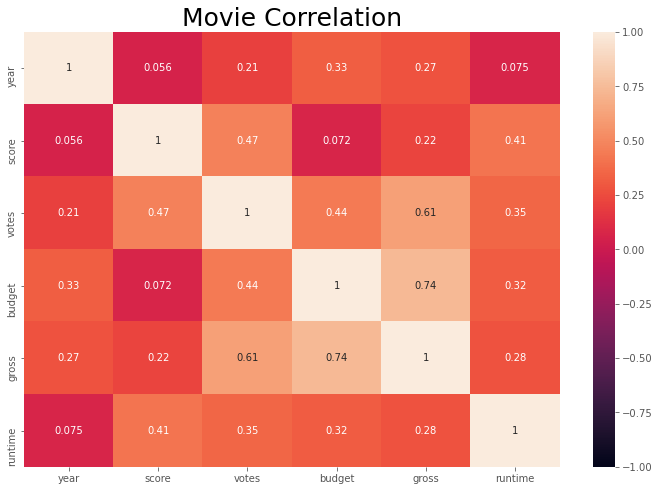

In [131]:
# 6. Finding Correlations between different variables

corr = df.corr()
sns.heatmap(corr, annot=True, vmin=-1)
plt.title('Movie Correlation', size=25)

plt.show()

# note that the plot shows correlation between numeric columns only

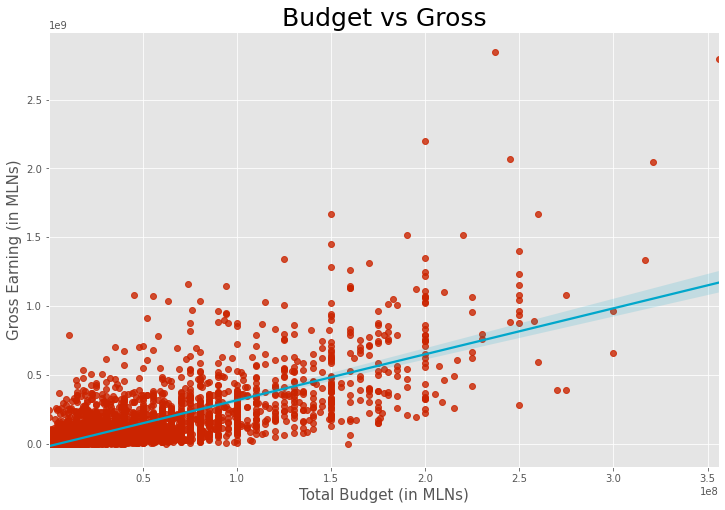

In [132]:
# from the obtained correlation heat maps we observe that gross and budget has higher dependency value
# lets take a closer look at those 2 numeric variables by plotting a scatter plot

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'#cb2400'}, line_kws={'color':'#00a7cb'})
plt.title('Budget vs Gross', size = 25)
plt.ylabel('Gross Earning (in MLNs)', size = 15)
plt.xlabel('Total Budget (in MLNs)', size = 15)

plt.show()

In [133]:
# just to check if the format of the column attributes are correct
print(list(df.columns))

['name', 'rating', 'genre', 'year', 'released', 'score', 'votes', 'director', 'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime']


In [134]:
# previously we only see correlation between numeric values
# to plot correlation for all the column variables we need to convert all the columns to numeric values

df_n = df.copy()
for col in df_n.columns:
   if df_n[col].dtype == 'object':
        df_n[col] = df_n[col].astype('category').cat.codes
df_n.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98
5,1509,6,9,1980,1922,6.4,123000,1758,3081,155,47,550000,39754601,1108,95
6,3930,6,0,1980,1359,7.9,188000,974,576,860,47,27000000,115229890,1397,133
7,3122,6,3,1980,530,8.2,330000,1269,1257,1469,47,18000000,23402427,390,129
8,3732,4,0,1980,1346,6.8,101000,1606,1402,595,47,54000000,108185706,548,127
9,4401,6,3,1980,1755,7.0,10000,2011,280,402,47,10000000,15795189,1391,100


In [135]:
df_n.dtypes

name          int16
rating         int8
genre          int8
year          int64
released      int16
score       float64
votes         int64
director      int16
writer        int16
star          int16
country        int8
budget        int64
gross         int64
company       int16
runtime       int64
dtype: object

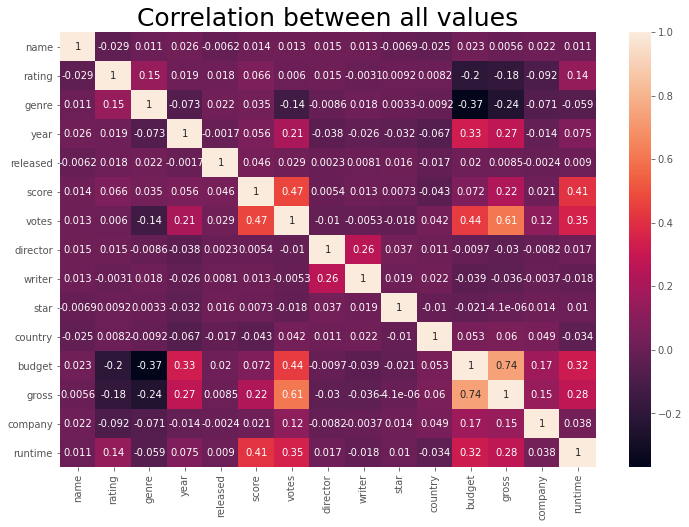

In [136]:
full_correlation = df_n.corr()
sns.heatmap(full_correlation, annot=True)
plt.title('Correlation between all values', size = 25)
plt.show()

In [137]:
# Unstack the matrix

corr_mat = df_n.corr()
corr_pairs = corr_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.368523
genre    budget    -0.368523
         gross     -0.244101
gross    genre     -0.244101
budget   rating    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [138]:
# finding the columns with high correlations

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr[:4]


votes   gross     0.614751
gross   votes     0.614751
        budget    0.740247
budget  gross     0.740247
dtype: float64

In [139]:
# Conclusion: Votes and Budget has the greatest impact on gross which in turn determines the movie's success

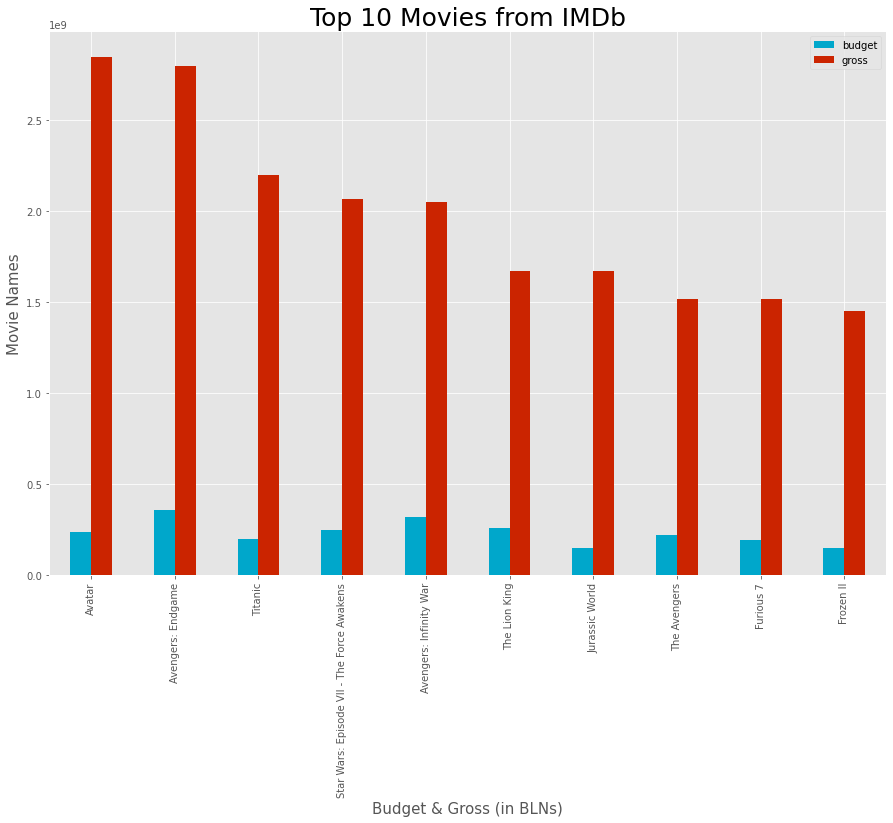

In [140]:
# 7. Exploratory Data Analysis and Visualisations

df_top10.plot(kind='bar', x='name',y=['budget','gross'],color={'budget':'#00a7cb','gross':'#cb2400'},figsize=(15,10))
plt.title('Top 10 Movies from IMDb',size=25)
plt.ylabel('Movie Names',size=15)
plt.xlabel('Budget & Gross (in BLNs)',size=15)
plt.show()

In [142]:
# top companies

top5_comp = df.groupby(['company'],as_index=False)['budget','gross'].sum().sort_values(by='gross', ascending=False)
top5_comp = top5_comp.head(5)
top5_comp

<ipython-input-142-4f530e621f4c>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top5_comp = df.groupby(['company'],as_index=False)['budget','gross'].sum().sort_values(by='gross', ascending=False)


,company,budget,gross
1426,Warner Bros.,19503300000,54610959970
1397,Universal Pictures,15989730001,51241105418
452,Columbia Pictures,15512107000,42356430218
1108,Paramount Pictures,13723450000,40021704691
1382,Twentieth Century Fox,11474600000,39542573303


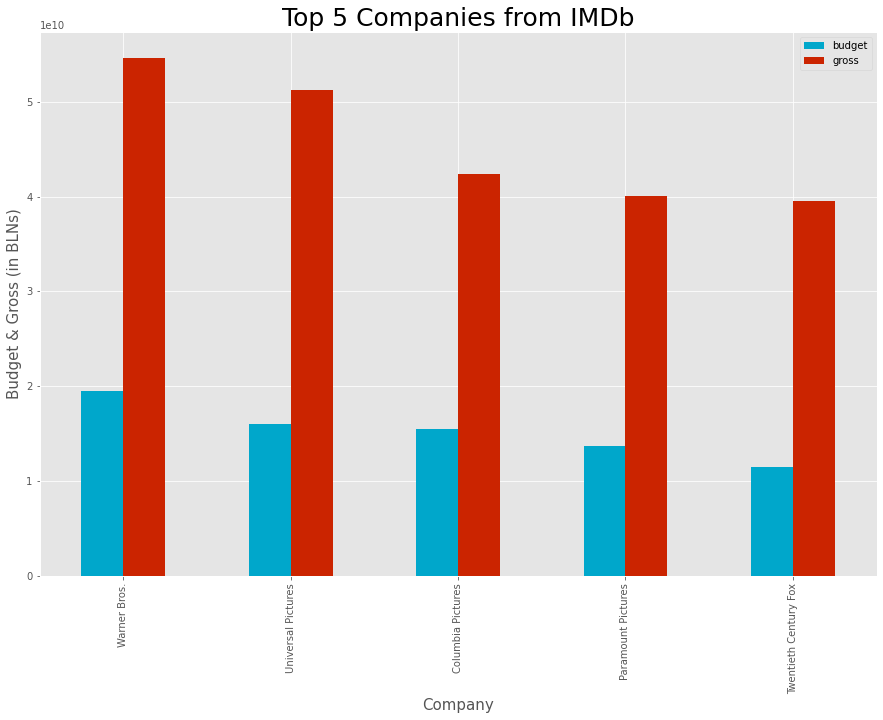

In [143]:
top5_comp.plot(kind='bar', x='company',y=['budget','gross'],color={'budget':'#00a7cb','gross':'#cb2400'},figsize=(15,10))
plt.title('Top 5 Companies from IMDb',size=25)
plt.ylabel('Budget & Gross (in BLNs)',size=15)
plt.xlabel('Company',size=15)
plt.show()

In [144]:
# Let's take a look at Genre vs Gross

gen_gr = df.groupby(['genre'], as_index=False)['gross'].sum().sort_values(by='gross',ascending=False)
gen_gr.reset_index()
gen_gr

,genre,gross
0,Action,237752868767
4,Comedy,88514817620
2,Animation,77865909110
6,Drama,52098564769
1,Adventure,43578711908
5,Crime,20017662162
3,Biography,19093930296
9,Horror,14261055032
7,Family,2074332587
10,Mystery,2004091467


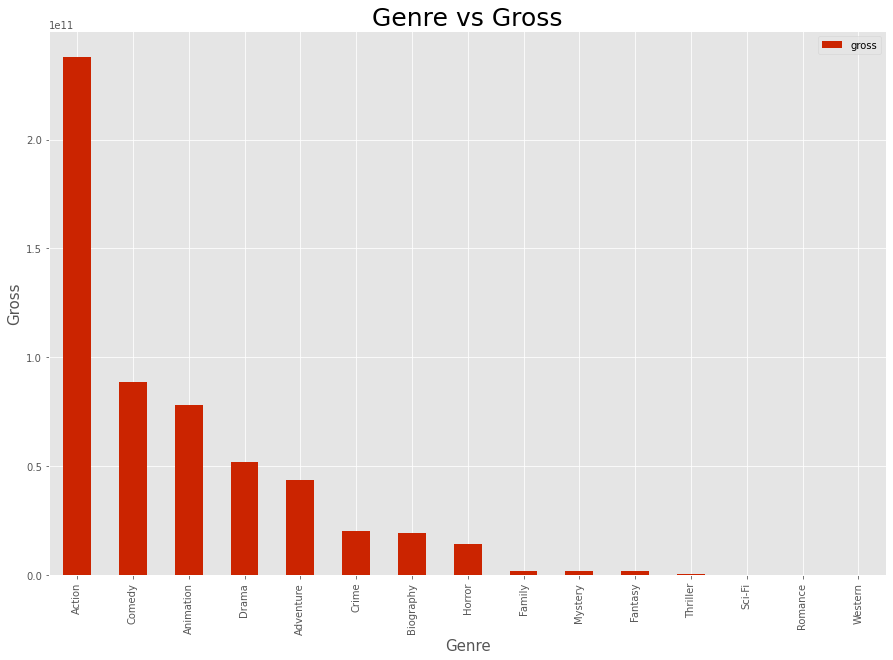

In [145]:
gen_gr.plot(kind='bar',x='genre',y='gross',color={'#cb2400'},figsize=(15,10))
plt.title('Genre vs Gross',size=25)
plt.xlabel('Genre',size=15)
plt.ylabel('Gross',size=15)
plt.show()

# Conclusion: Action genre is the most watched

In [146]:
# Writers vs Total Movie Ratings

writers = df.groupby(['writer'], as_index=False)['score','votes'].sum().sort_values(by='votes', ascending=False)
writers.reset_index()
top10_writers = writers.head(10)
top10_writers

<ipython-input-146-f0bee736b431>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  writers = df.groupby(['writer'], as_index=False)['score','votes'].sum().sort_values(by='votes', ascending=False)


,writer,score,votes
2447,Quentin Tarantino,88.1,9146000
1606,Jonathan Nolan,34.5,6800000
2832,Stephen King,187.1,6467900
1263,James Cameron,62.4,5155000
1238,J.R.R. Tolkien,26.4,4900000
513,Christopher Markus,51.9,4377000
516,Christopher Nolan,39.9,4358000
1846,Lilly Wachowski,55.6,4171000
1525,John Lasseter,58.2,3311000
1898,M. Night Shyamalan,69.1,3155900


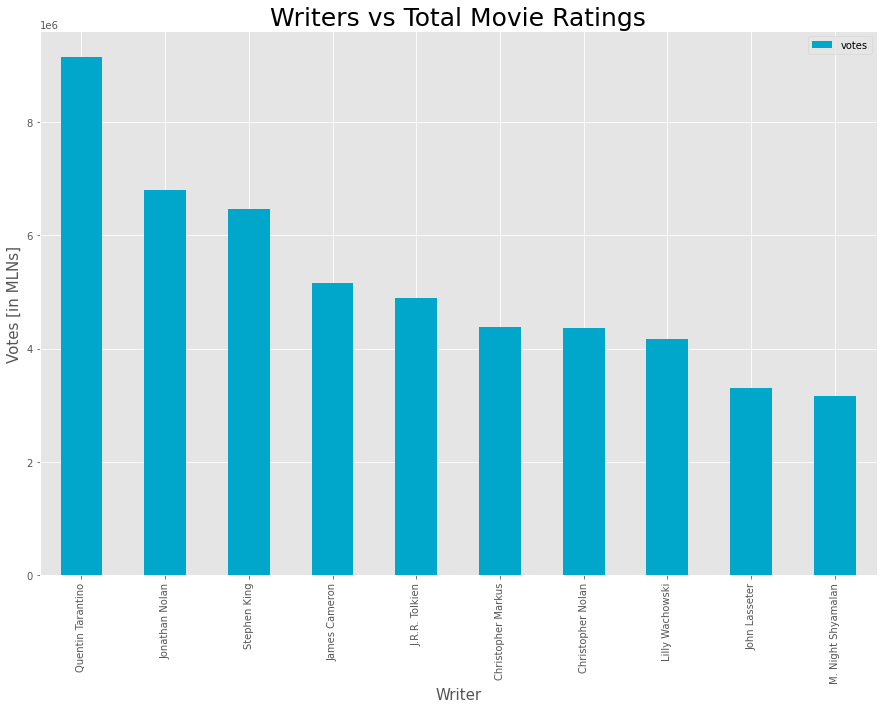

In [147]:
top10_writers.plot(kind='bar',x='writer',y='votes',color={'#00a7cb'},figsize=(15,10))
plt.title('Writers vs Total Movie Ratings',size=25)
plt.xlabel('Writer',size=15)
plt.ylabel('Votes [in MLNs]',size=15)
plt.show()

# Conclusion: Talented Tarantino FTW 

In [148]:
# Stars vs Total Movie Ratings

stars = df.groupby(['star'],as_index=False)['votes'].sum().sort_values(by='votes',ascending=False)
top10_stars = stars.head(10)
top10_stars

,star,votes
1735,Tom Hanks,12421000
1073,Leonardo DiCaprio,12027000
297,Christian Bale,9985000
187,Brad Pitt,8698800
889,Johnny Depp,8280000
1470,Robert Downey Jr.,8279700
1732,Tom Cruise,8241200
220,Bruce Willis,6984500
1812,Will Smith,6332000
983,Keanu Reeves,6285000


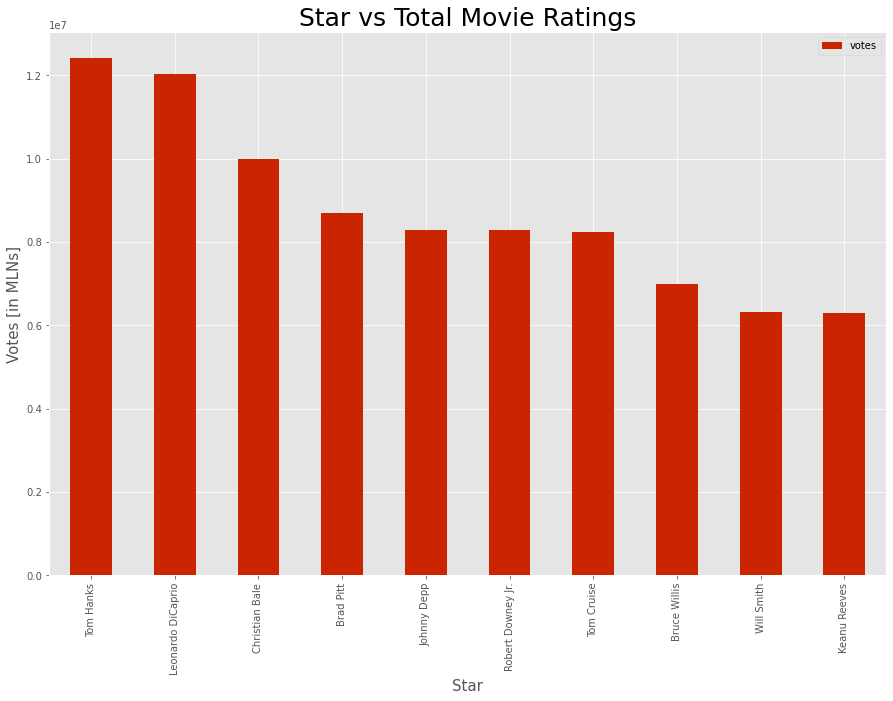

In [149]:
top10_stars.plot(kind='bar',x='star',y='votes',color={'#cb2400'},figsize=(15,10))
plt.title('Star vs Total Movie Ratings',size=25)
plt.xlabel('Star',size=15)
plt.ylabel('Votes [in MLNs]',size=15)
plt.show()

# Conclusion: Tom Hanks' movies are usually rated high (but I personally like DiCaprio :) )

In [151]:
# Top Rated Movies from IMDb

df_movies = df.sort_values(by='score', ascending=False)
top_movies = df_movies[df_movies['score'] > 8.5]
top_movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000,Frank Darabont,Stephen King,Tim Robbins,United States,25000000,28817291,Castle Rock Entertainment,142
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000,1005973645,Warner Bros.,152
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000,322161245,Universal Pictures,195
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000,213928762,Miramax,154
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000,1146030912,New Line Cinema,201
5643,Inception,PG-13,Action,2010,"July 16, 2010 (United States)",8.8,2100000,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,160000000,836836967,Warner Bros.,148
2445,Forrest Gump,PG-13,Drama,1994,"July 6, 1994 (United States)",8.8,1900000,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000,678226133,Paramount Pictures,142
3444,Fight Club,R,Drama,1999,"October 15, 1999 (United States)",8.8,1900000,David Fincher,Chuck Palahniuk,Brad Pitt,Germany,63000000,101209702,Fox 2000 Pictures,139
3845,The Lord of the Rings: The Fellowship of the Ring,PG-13,Action,2001,"December 19, 2001 (United States)",8.8,1700000,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,93000000,897690072,New Line Cinema,178
3443,The Matrix,R,Action,1999,"March 31, 1999 (United States)",8.7,1700000,Lana Wachowski,Lilly Wachowski,Keanu Reeves,United States,63000000,466364845,Warner Bros.,136


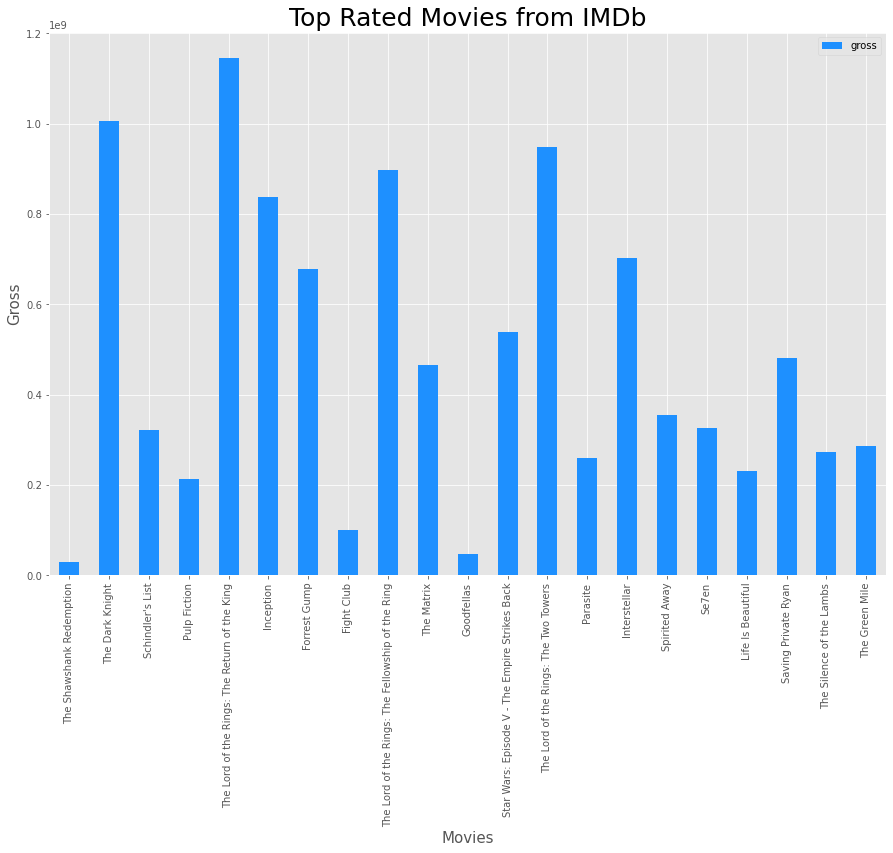

In [154]:
top_movies.plot(kind='bar',x='name',y='gross',color='dodgerblue',figsize=(15,10))
plt.title('Top Rated Movies from IMDb',size=25)
plt.xlabel('Movies',size=15)
plt.ylabel('Gross',size=15)
plt.show()